In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
warnings.filterwarnings('ignore')

In [3]:
DATASET_PATH='/Users/lokeshnagasaidarla/Developer/webdev/sleep-health-cardio-prediction/sleep-health-detection/dataset/'
df = pd.read_csv(os.path.join(DATASET_PATH, "preprocessed_data.csv"))

In [4]:
# Split the data into features and target variable
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# For continuous features
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [7]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


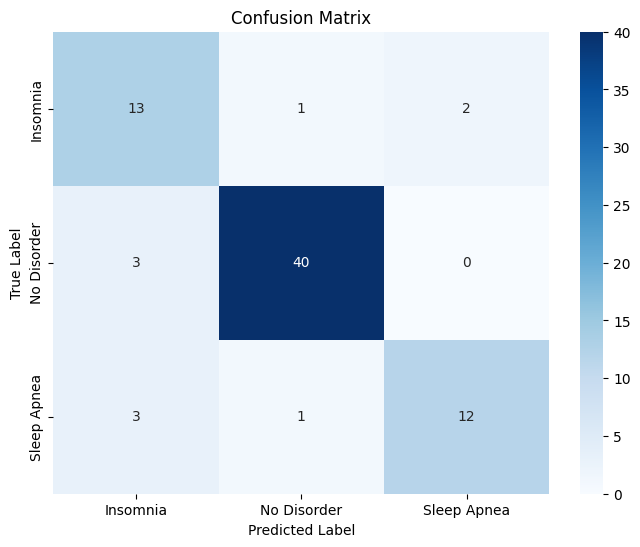

In [8]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)  # Use output_dict for better formatting
conf_matrix = confusion_matrix(y_test, y_pred)

report_df = pd.DataFrame(report).transpose()

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
# Save the model
MODELS_PATH='/Users/lokeshnagasaidarla/Developer/webdev/sleep-health-cardio-prediction/sleep-health-detection/models/'
with open(os.path.join(MODELS_PATH, "naive_bayes.pkl"), 'wb') as file:
    pickle.dump(model, file)